# Predicting Energy Consumption in a Smart Building
###  Using Linear Regression, Decison Tree Regressor, Random Forest Regressor and Support Vector Regressor to make predictions

### Introduction
Linear regression can be a valuable tool in the energy sector for various predictive modeling tasks. One modern data science problem in the energy sector where linear regression can be applied is predicting energy consumption or production based on historical data and other relevant features. Here's a scenario where linear regression can be used:

**Problem**: Predicting Energy Consumption in a Smart Building

**Description**:
Imagine you are working with a smart building management system that collects data on energy consumption, temperature, occupancy, and other relevant factors. The goal is to develop a predictive model that can forecast future energy consumption in the building. This prediction can be used for various purposes, such as optimizing energy usage, planning maintenance, and cost reduction.

## About Data

### Data source
This is a synthetic data using python code for a predictive modeling task like energy consumption prediction which can be useful for experimentation and learning.

Generating synthetic data for a predictive modeling task like energy consumption prediction can be useful for experimentation and learning. Below, I'll provide you with a simple example of synthetic data with relevant fields for predicting energy consumption in a smart building:

In this synthetic dataset:

- `Date` represents the date of the data entry.
- `Hour` represents the hour of the day.
- `Temperature (Celsius)` is the temperature inside or outside the building.
- `Occupancy` represents the number of people in the building.
- `Weather Data (1-100)` represents some composite weather conditions, where higher values might indicate worse weather conditions.
- `Energy Consumption (kWh)` is the target variable, representing the energy consumed in kilowatt-hours.

This is a simplified example, and in a real-world scenario, you would likely have more data points and additional features. You can generate more data points using a scripting language like Python or by using data generation tools to create a larger and more diverse dataset for training and testing your predictive model.

## Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

## Generating synthetic Data

In [2]:
# Initializing an empty list to store data
data = []

In [3]:
# Defining the data range
start_date = datetime(2023, 9, 1)
end_date = datetime(2023, 9, 30)
date_range = [start_date + timedelta(days=i) for i in range ((end_date - start_date).days + 1)]

In [4]:
# Generate 1000 random data points
for _ in range(1000):
    date = random.choice(date_range)
    hour = random.randint(0, 23)
    temperature = random.uniform(18, 32)  # Celsius
    occupancy = random.randint(0, 30)  # Number of occupants
    weather_data = random.randint(50, 100)  # Weather data (scaled from 1-100)
    energy_consumption = random.uniform(40, 90)  # kWh
    
    data.append([date, hour, temperature, occupancy, weather_data, energy_consumption])

In [5]:
# Create a DataFrame from the data
columns = ['Date', 'Hour', 'Temperature (Celsius)', 'Occupancy', 'Weather Data (1-100)', 'Energy Consumption (kWh)']
df = pd.DataFrame(data, columns=columns)

In [7]:
# Save the DataFrame to a CSV file
df.to_csv('energy_consumption_data.csv', index=False)

In [11]:
# Load the dataset
df = pd.read_csv('energy_consumption_data.csv')

# Data Exploration and Visualization

In [14]:
df.head()

,Date,Hour,Temperature (Celsius),Occupancy,Weather Data (1-100),Energy Consumption (kWh)
0,2023-09-24,20,19.486241,5,54,71.626136
1,2023-09-08,23,24.132798,29,81,72.398797
2,2023-09-30,9,23.998812,22,56,52.750474
3,2023-09-30,21,29.104133,12,65,68.604149
4,2023-09-15,7,22.343269,3,67,81.816743


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1000 non-null   object 
 1   Hour                      1000 non-null   int64  
 2   Temperature (Celsius)     1000 non-null   float64
 3   Occupancy                 1000 non-null   int64  
 4   Weather Data (1-100)      1000 non-null   int64  
 5   Energy Consumption (kWh)  1000 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [16]:
df.describe()

,Hour,Temperature (Celsius),Occupancy,Weather Data (1-100),Energy Consumption (kWh)
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,11.621000,25.124736,14.76200,74.707000,65.160703
std,6.862248,4.123087,8.92676,14.691392,14.648922
min,0.000000,18.007179,0.00000,50.000000,40.044934
25%,6.000000,21.450139,7.00000,62.000000,52.129473
50%,11.000000,25.109239,15.00000,74.000000,65.310704
75%,18.000000,28.821921,22.00000,87.000000,78.047151
max,23.000000,31.989190,30.00000,100.000000,89.964602


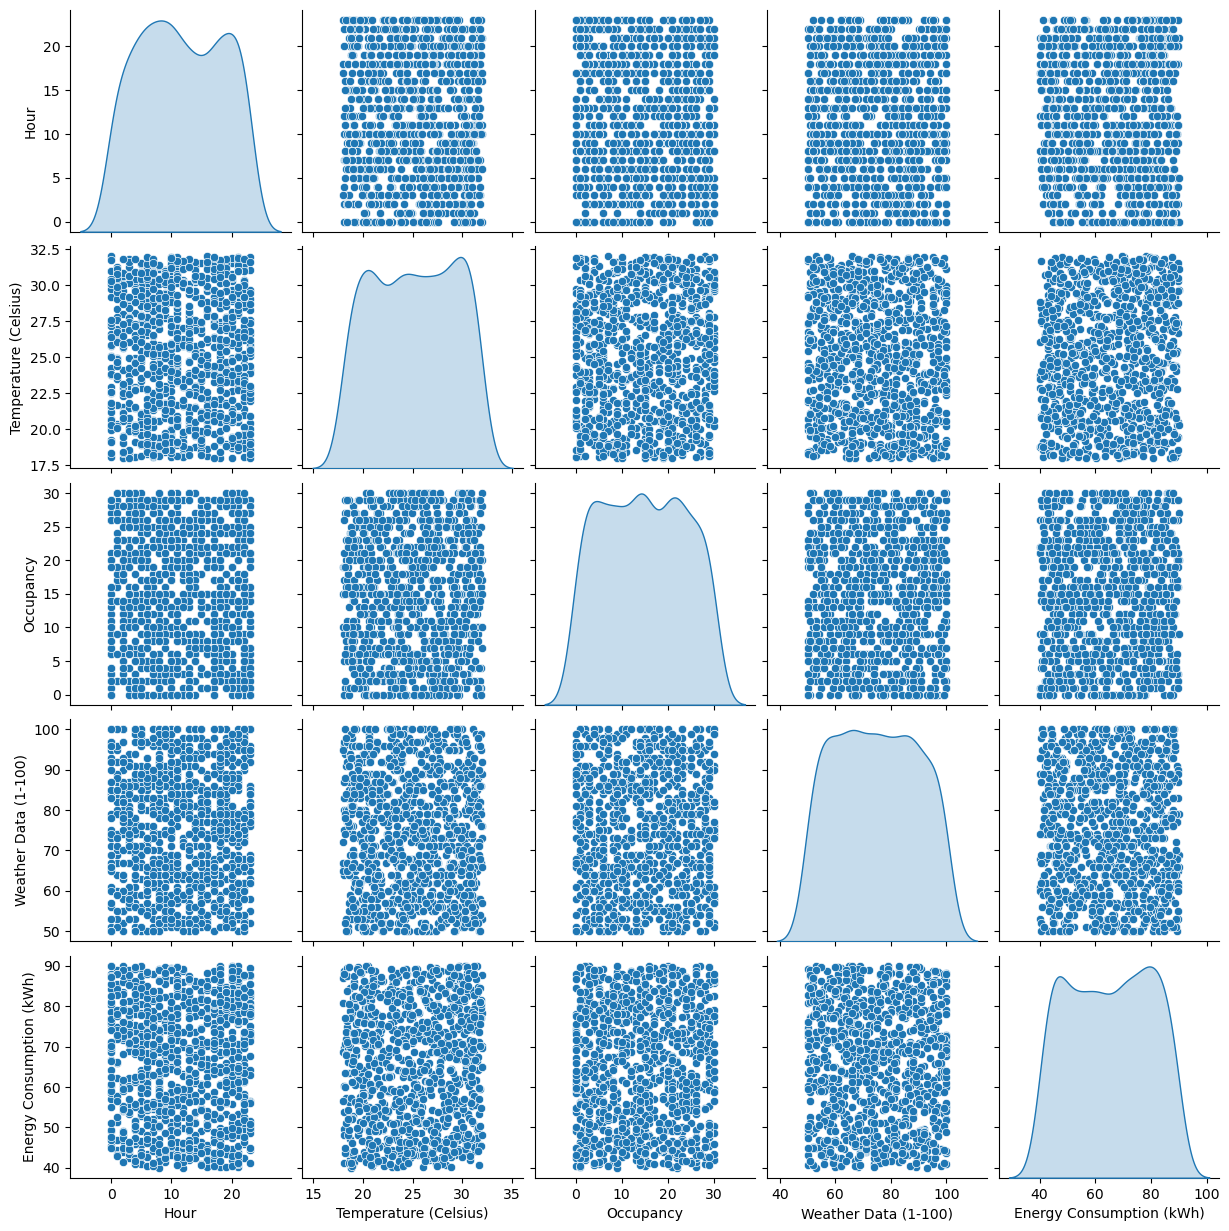

In [12]:
# Pairplot to visualize relationships and distributions
sns.pairplot(df, diag_kind='kde')
plt.show()

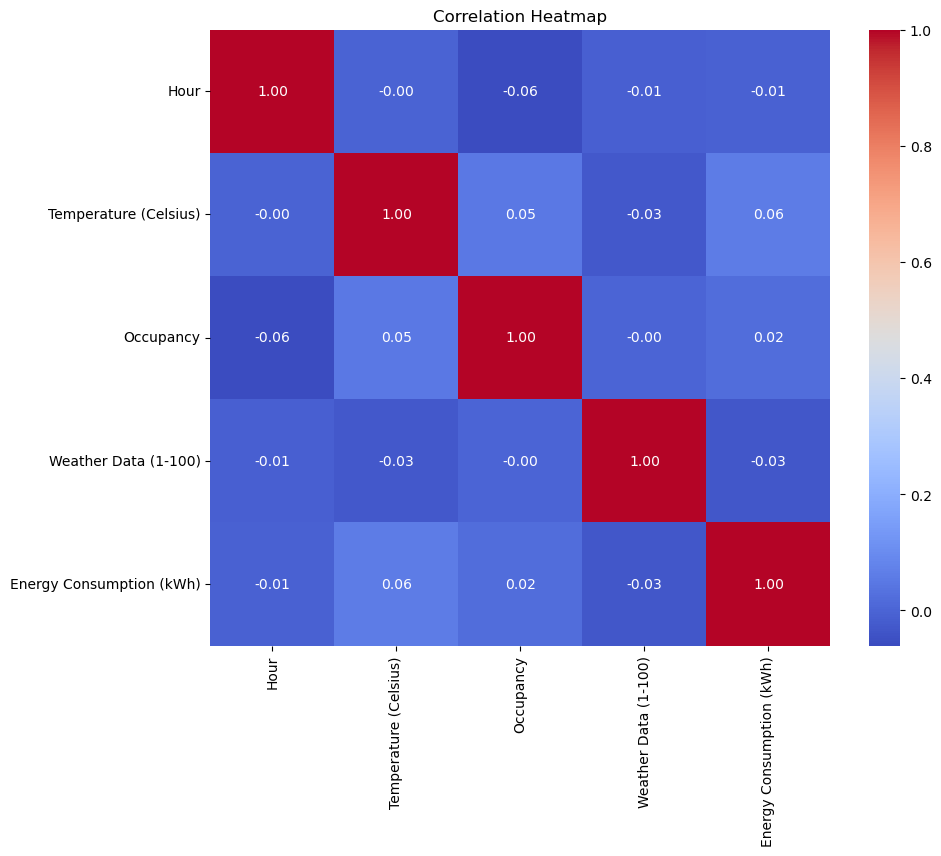

In [13]:
# Heatmap to visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Splitting data into dependent and Independent 

In [37]:
X = df[['Temperature (Celsius)', 'Occupancy', 'Weather Data (1-100)', 'Hour']]
y = df['Energy Consumption (kWh)']

In [39]:
# Data Splicing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
# Modelling using linear regression
model = LinearRegression()

# fitting model
model.fit(X_train, y_train)

# predicting from model
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 221.17
R-squared (R2): -0.01


## Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')
print(f'R-squared (R2): {r2_dt:.2f}')

Mean Squared Error (MSE): 428.67
R-squared (R2): -0.96


## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'R-squared (R2): {r2_rf:.2f}')

Mean Squared Error (MSE): 248.88
R-squared (R2): -0.14


## Support Vector Regressor

In [46]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Mean Squared Error (MSE): {mse_svr:.2f}')
print(f'R-squared (R2): {r2_svr:.2f}')

Mean Squared Error (MSE): 224.26
R-squared (R2): -0.03


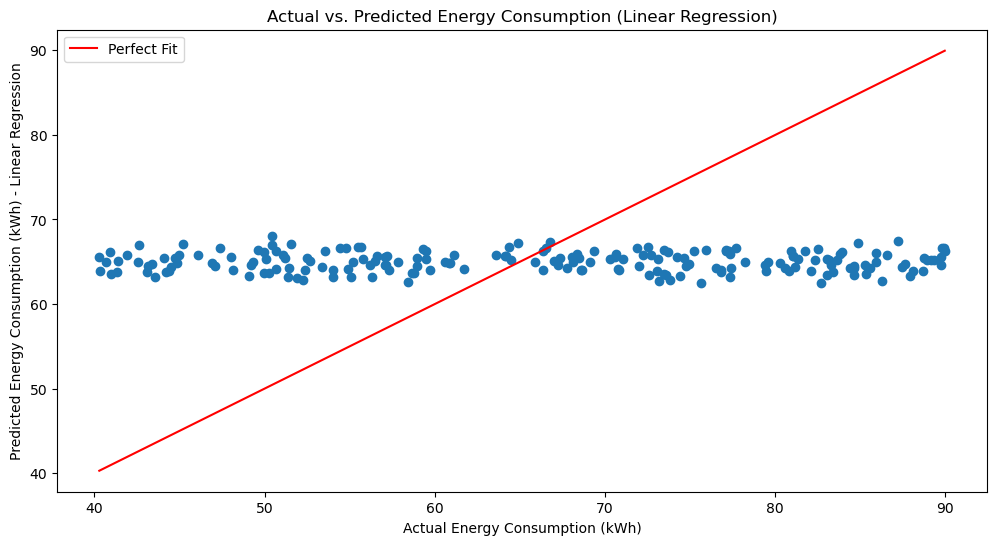

In [51]:
# Visualization of Predictions vs. Actual for Linear Regressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') # Regression line
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh) - Linear Regression')
plt.title('Actual vs. Predicted Energy Consumption (Linear Regression)')
plt.show()

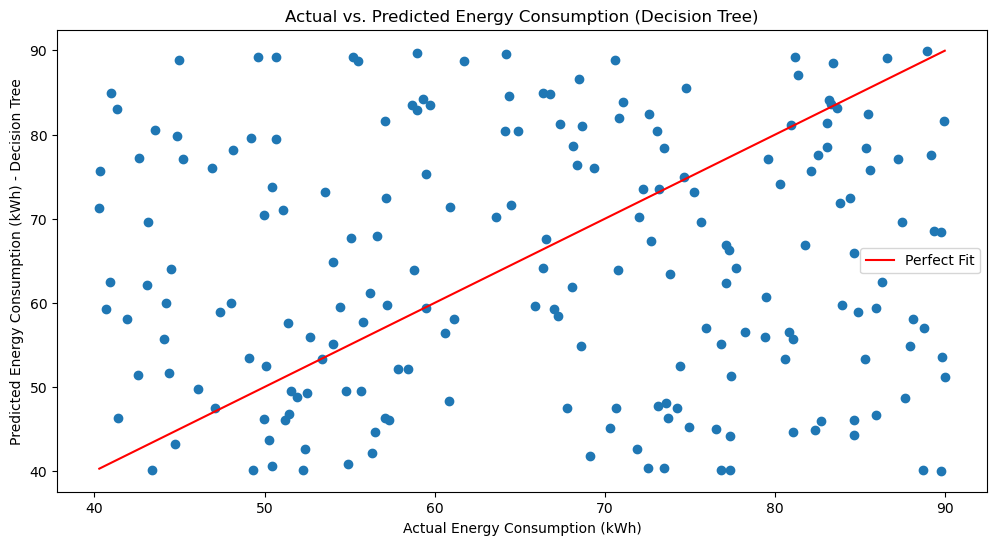

In [52]:
# Visualization of Predictions vs. Actual for Decision Tree Regressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_dt)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') # Regression line
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh) - Decision Tree')
plt.title('Actual vs. Predicted Energy Consumption (Decision Tree)')
plt.show()

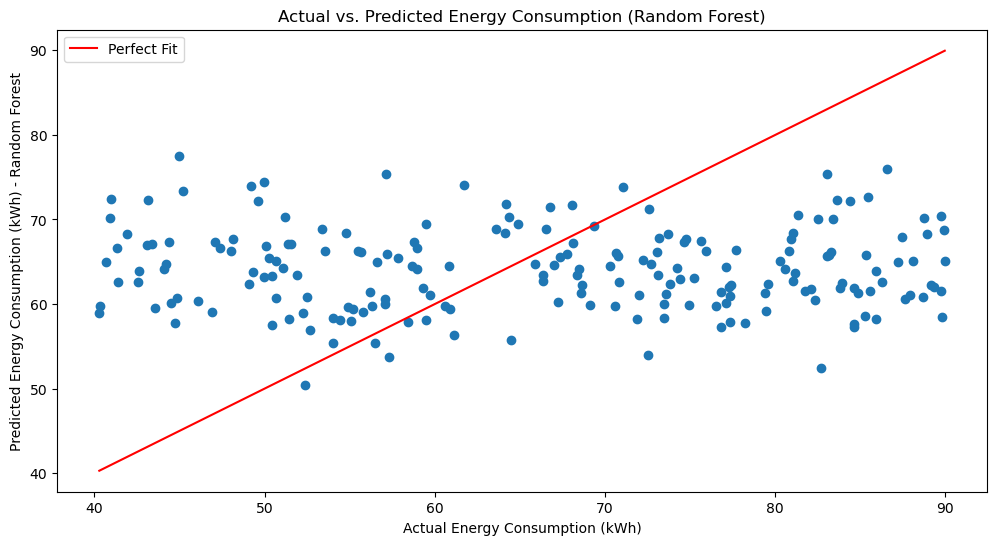

In [53]:
# Visualization of Predictions vs. Actual for Random Forest Regressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') # Regression line
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh) - Random Forest')
plt.title('Actual vs. Predicted Energy Consumption (Random Forest)')
plt.show()

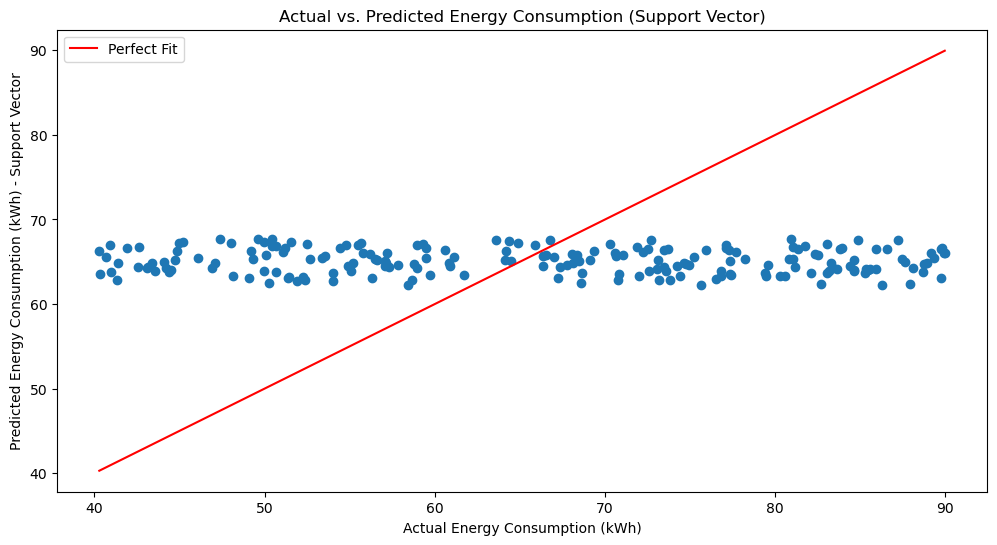

In [54]:
# Visualization of Predictions vs. Actual for Support Vector Regressor
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svr)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') # Regression line
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh) - Support Vector')
plt.title('Actual vs. Predicted Energy Consumption (Support Vector)')
plt.show()

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create scatter plots with regression lines
def plot_regression_line(model, X_test, y_test, title):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of X test data vs. Predicted values
    plt.scatter(X_test['Temperature (Celsius)'], y_test, label='Actual', alpha=0.5)
    plt.scatter(X_test['Temperature (Celsius)'], model.predict(X_test), label='Predicted', alpha=0.5)
    
    # Sort the data points for the regression line
    sorted_indices = X_test['Temperature (Celsius)'].argsort()
    X_test_sorted = X_test.iloc[sorted_indices]
    y_pred_sorted = model.predict(X_test_sorted)
    
    # Plot the regression line
    plt.plot(X_test_sorted['Temperature (Celsius)'], y_pred_sorted, color='red', linewidth=3, label='Regression Line')
    
    plt.xlabel('Temperature (Celsius)')
    plt.ylabel('Energy Consumption (kWh)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot regression lines for each model

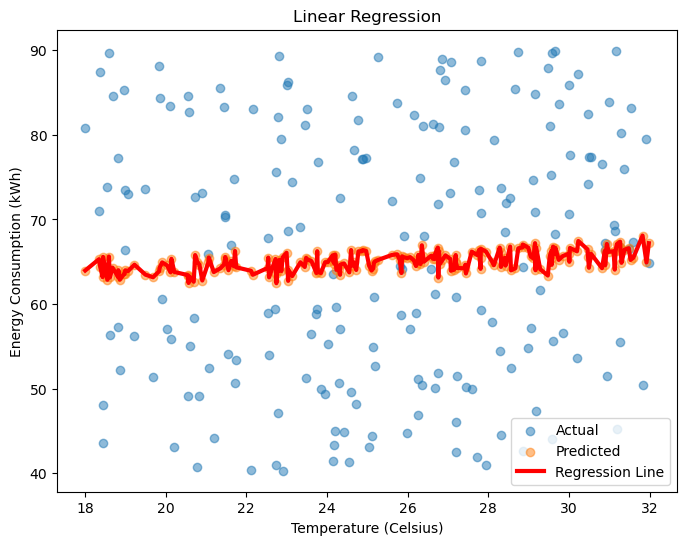

In [74]:
plot_regression_line(model, X_test, y_test, 'Linear Regression')

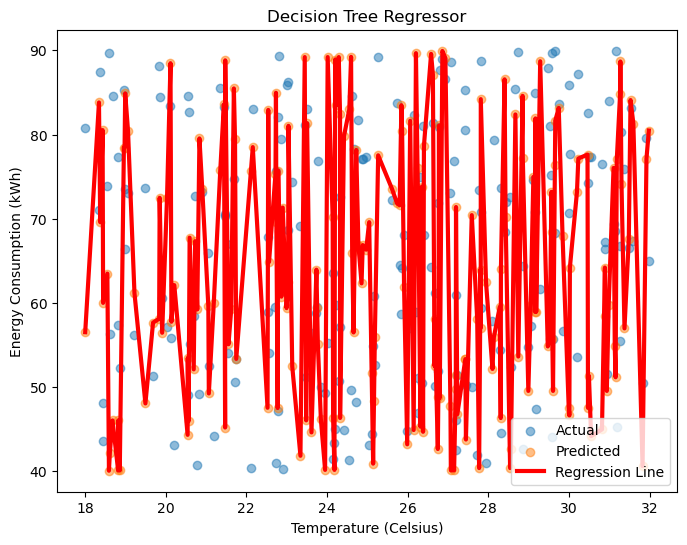

In [58]:
plot_regression_line(model_dt, X_test, y_test, 'Decision Tree Regressor')

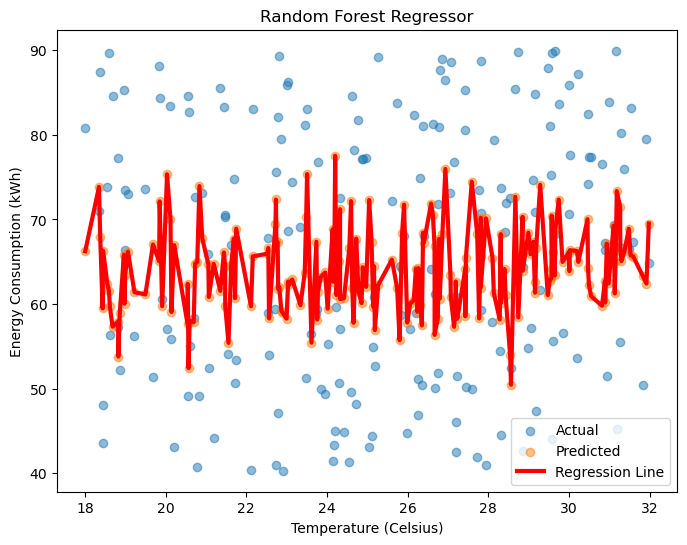

In [59]:
plot_regression_line(model_rf, X_test, y_test, 'Random Forest Regressor')

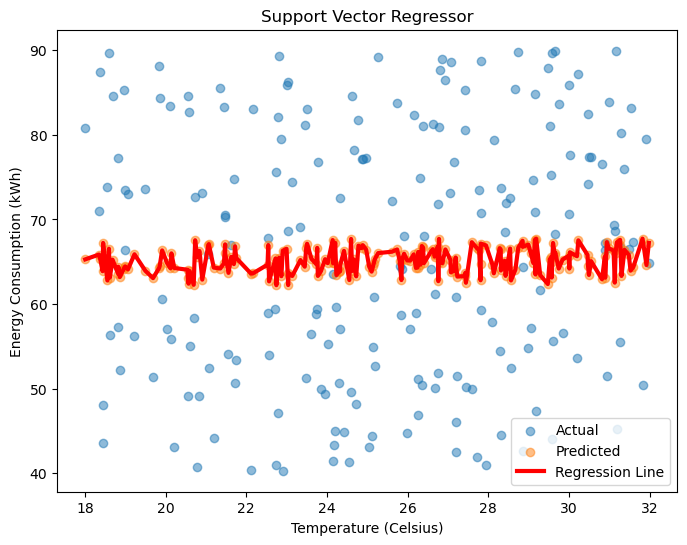

In [60]:
plot_regression_line(model_svr, X_test, y_test, 'Support Vector Regressor')